In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

# Stock of intetest

In [13]:
ticker = 'GOOGL' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2009-11-1')['Adj Close']


log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))


In [3]:
data.head()

,GOOGL
Date,
2009-11-02,267.262268
2009-11-03,268.913910
2009-11-04,270.435425
2009-11-05,274.599609
2009-11-06,275.825836


In [4]:
log_returns = np.log(1 + data.pct_change())

In [5]:
log_returns.tail()

,GOOGL
Date,
2019-11-22,-0.004989
2019-11-25,0.009210
2019-11-26,0.005621
2019-11-27,-0.000663
2019-11-29,-0.006146


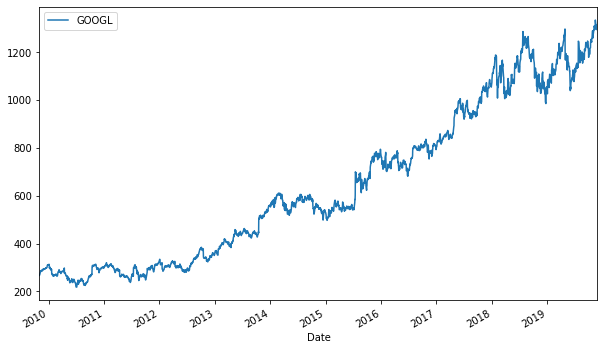

In [6]:
data.plot(figsize=(10, 6));

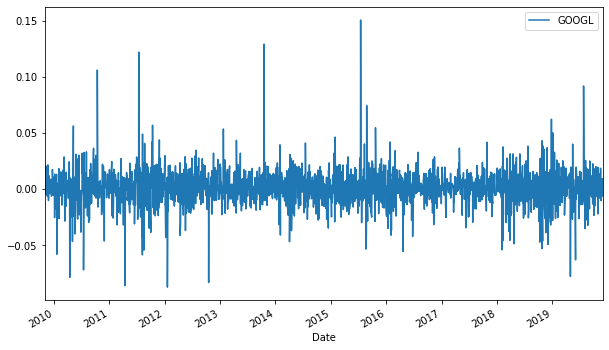

In [7]:
log_returns.plot(figsize = (10, 6))

In [20]:
S0 = data.iloc[-1]
S0

GOOGL    1304.089966
Name: 2019-11-29 00:00:00, dtype: float64

In [21]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
price_list[0] = S0
price_list

array([[1304.08996582, 1304.08996582, 1304.08996582, ..., 1304.08996582,
        1304.08996582, 1304.08996582],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [24]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [25]:
price_list

array([[1304.08996582, 1304.08996582, 1304.08996582, ..., 1304.08996582,
        1304.08996582, 1304.08996582],
       [1337.06991875, 1321.31569543, 1317.03414324, ..., 1311.48822218,
        1333.22861801, 1305.72403627],
       [1342.83412022, 1308.22093857, 1313.60691887, ..., 1320.80512077,
        1322.53180029, 1286.36591488],
       ...,
       [1526.00468504, 1158.65193367, 1285.03938624, ..., 1089.38382536,
        1102.66880444, 1598.75238294],
       [1508.29444077, 1177.38911698, 1276.67093044, ..., 1105.21176682,
        1104.13007827, 1649.46651184],
       [1492.38037586, 1162.14744726, 1291.6261769 , ..., 1111.17575974,
        1105.34927476, 1658.74820978]])

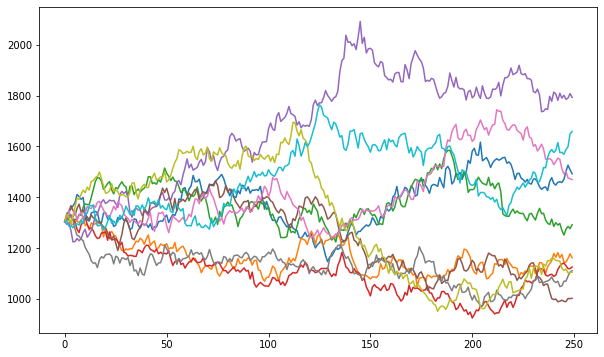

In [26]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

In [33]:
df= pd.DataFrame(price_list)

In [34]:
df

,0,1,2,3,4,5,6,7,8,9
0,1304.089966,1304.089966,1304.089966,1304.089966,1304.089966,1304.089966,1304.089966,1304.089966,1304.089966,1304.089966
1,1337.069919,1321.315695,1317.034143,1315.759433,1293.268373,1329.207107,1308.012466,1311.488222,1333.228618,1305.724036
2,1342.834120,1308.220939,1313.606919,1330.069272,1299.688469,1343.013371,1348.765969,1320.805121,1322.531800,1286.365915
3,1354.187231,1295.541767,1331.034535,1321.955867,1268.843118,1367.268472,1320.158915,1330.759248,1295.931127,1289.345520
4,1366.046884,1291.877709,1311.044452,1313.207354,1224.423716,1349.003052,1321.512017,1310.725369,1328.411094,1279.652590
...,...,...,...,...,...,...,...,...,...,...
245,1470.280933,1143.728572,1251.135677,1140.546339,1801.288872,990.096474,1492.251883,1069.529597,1111.865611,1568.744036
246,1501.931585,1144.876582,1274.337616,1130.482405,1784.911499,989.355669,1501.992742,1069.680908,1116.707889,1587.851316
247,1526.004685,1158.651934,1285.039386,1119.206350,1790.596733,1001.643451,1475.982614,1089.383825,1102.668804,1598.752383
248,1508.294441,1177.389117,1276.670930,1118.945470,1807.858251,1001.075815,1472.724667,1105.211767,1104.130078,1649.466512


In [35]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1384.515679,1164.889432,1379.225755,1101.876954,1678.334332,1245.436107,1422.155071,1124.539660,1313.751441,1474.178449
std,100.108946,63.662340,77.590300,89.311539,219.761599,132.941914,134.723002,65.994337,223.178606,129.779125
min,1146.527960,1049.117367,1223.744286,924.941902,1224.423716,989.051785,1239.688927,971.349784,951.153527,1271.239081
25%,1301.244799,1116.500399,1321.706631,1041.941255,1515.377619,1123.998101,1321.795049,1084.972691,1094.516509,1357.899249
50%,1402.947796,1150.050511,1366.835625,1104.646130,1752.809859,1261.958814,1367.778695,1140.884492,1372.938751,1472.792062
75%,1459.514557,1211.370086,1443.522819,1146.828396,1853.576799,1367.069154,1516.889696,1165.916080,1532.666532,1591.971267
max,1616.623420,1323.084951,1584.264390,1330.069272,2091.641904,1464.328617,1744.385957,1330.759248,1695.030699,1763.623315
